# code


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Selected features: (1, 6, 7, 14, 18, 24)


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


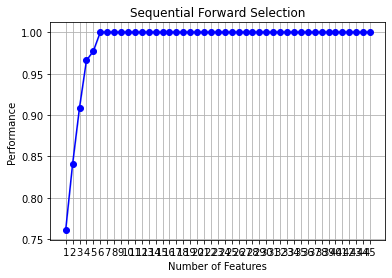

Intercept: 
 29.386363636363658
Coefficients: 
 [-13.36683576   4.34735772   0.           0.          -3.68437741
  -0.        ]
-0.23780534421702026
4686.997363465422


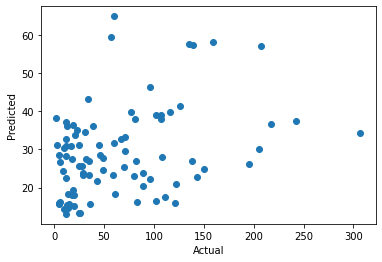

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Selected features: (0, 1, 4, 5, 6, 8, 9, 10, 11, 13, 14, 16, 21, 22, 27, 35, 36, 39, 43)


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


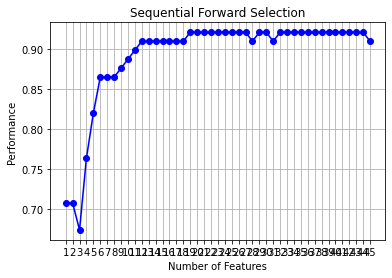

Intercept: 
 64.561797752809
Coefficients: 
 [ -0.          -7.51954957  -4.99163188  -0.         -10.83100211
 -10.28134107   0.           0.          -0.           0.
  -8.30123443   0.           0.           5.91220891   0.
  16.28871812   3.49600871   7.37674174  -6.74511973]
-1.4312718763067513
2514.566798693011


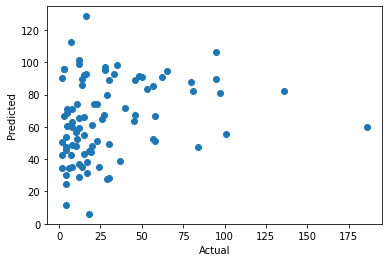

Scores: [-0.23780534421702026, -1.4312718763067513]
Mean: -0.835
Std: 0.597
Scores: [4686.997363465422, 2514.566798693011]
Mean: 3600.782
Std: 1086.215


In [6]:
# Lasso linear
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib import pyplot as plt
import xgboost as xgb
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn import linear_model


def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

chargers_address = pd.read_csv('https://raw.githubusercontent.com/amberguo/ev-charger/main/stations_with_geoanalyzed_features_and_outcomes_1_km.csv')

# X_full = chargers_address[['num_pois_nearby','Distance To Freeway (in miles)', 'ev_car_count', 'concentrated_disadvantage', 
                           #'commute_time', 'cars_per_home', 'median_household_income', 'total_population', 
                           #'pop_below_18', 'pop_between_18_34', 'pop_between_34_65', 'pop_over_65']]
X_full = chargers_address[chargers_address.columns.difference(['Unnamed: 0.1', 'total_connection_time', 'total_amount', 'total_kwh', 'total_sessions','lat','lon','Unnamed: 0', 'Station','Address', 'zipcode', 'Geo_FIPS'])]
y_full = chargers_address['total_sessions']

kfold = KFold(n_splits=2)

r2scores = []
scores = []
cvlist = list(kfold.split(X_full))
for train_index, test_index in kfold.split(X_full):   
    X_train, X_test = X_full.iloc[train_index], X_full.iloc[test_index]
    y_train, y_test = y_full[train_index], y_full[test_index]

    # Transformation
    pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)
    X_train = pt.fit_transform(X_train)
    X_test = pt.transform(X_test)

    # feature selection
    estimator = xgb.XGBClassifier()
    sfs1 = SFS(estimator, k_features="best", forward=True, floating=False, scoring='accuracy', cv=0)
    sfs1 = sfs1.fit(X_train, y_train)
    print('Selected features:', sfs1.k_feature_idx_)
       
    fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

    plt.title('Sequential Forward Selection')
    plt.grid()
    plt.show()

    X_train = sfs1.transform(X_train)
    X_test = sfs1.transform(X_test)

    # regression
    model = linear_model.Lasso()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print('Intercept: \n', model.intercept_)
    print('Coefficients: \n', model.coef_)

    print(r2_score(y_test, y_pred))
    print(mean_squared_error(y_test, y_pred))  
    r2scores.append(r2_score(y_test, y_pred))
    scores.append(mean_squared_error(y_test, y_pred))

    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

display_scores(r2scores)
display_scores(scores)

In [ ]:
# XGBoost
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib import pyplot as plt
import xgboost as xgb
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn import linear_model

def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

chargers_address = pd.read_csv('https://raw.githubusercontent.com/amberguo/ev-charger/main/stations_with_geoanalyzed_features_and_outcomes_1km.csv')

X_full = chargers_address[chargers_address.columns.difference(['Unnamed: 0.1', 'total_connection_time', 'total_amount', 'total_kwh', 'total_sessions','lat','lon','Unnamed: 0', 'Station','Address', 'zipcode', 'Geo_FIPS'])]
y_full = chargers_address['total_sessions']

kfold = KFold(n_splits=10)

r2scores = []
scores = []
cvlist = list(kfold.split(X_full))
for train_index, test_index in kfold.split(X_full):   
    X_train, X_test = X_full.iloc[train_index], X_full.iloc[test_index]
    y_train, y_test = y_full[train_index], y_full[test_index]
    
    # Transformation
    pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)
    # pt = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
    X_train = pt.fit_transform(X_train)
    X_test = pt.transform(X_test)
    
    # feature selection
    estimator = xgb.XGBClassifier()
    sfs1 = SFS(estimator, k_features="best", forward=True, floating=False, scoring='accuracy', cv=0)
    sfs1 = sfs1.fit(X_train, y_train)
    print('Selected features:', sfs1.k_feature_idx_)
    #print(sfs.subsets_)
   
    fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

    plt.ylim([0.8, 1])
    plt.title('Sequential Forward Selection (w. StdDev)')
    plt.grid()
    plt.show()

    X_train = sfs1.transform(X_train)
    X_test = sfs1.transform(X_test)
    

    # regression
    xgb_model = xgb.XGBRegressor(objective ='reg:squarederror')
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    r2scores.append(r2_score(y_test, y_pred))
    scores.append(mean_squared_error(y_test, y_pred))


    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

display_scores(r2scores)
display_scores(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Selected features: (1, 2, 13, 14, 24, 44)


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


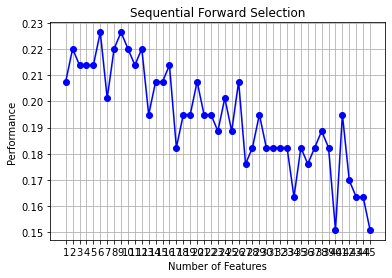

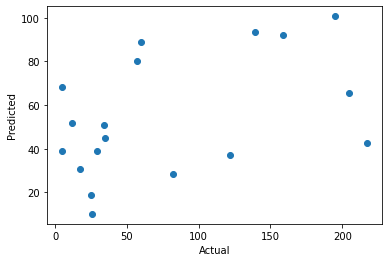

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Selected features: (2, 4, 29, 35, 36, 39)


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


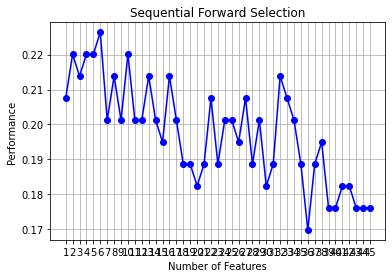

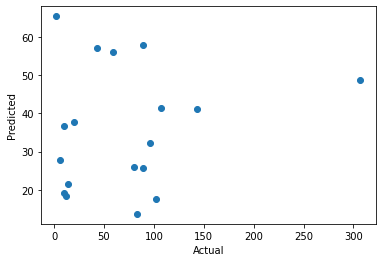

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Selected features: (12, 13, 17, 32, 39, 44)


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


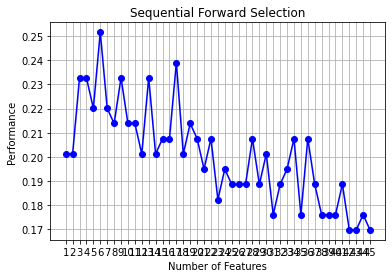

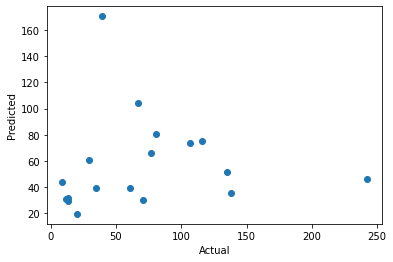

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Selected features: (22, 29)


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


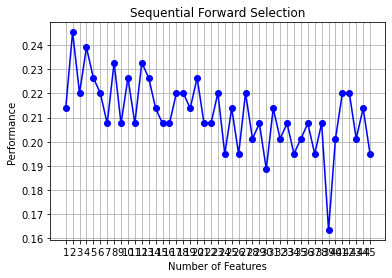

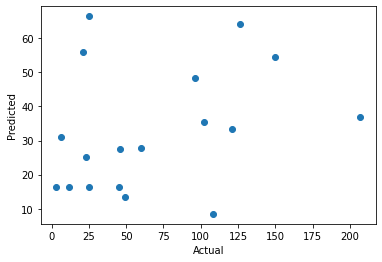

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Selected features: (21, 22, 25, 32, 34)


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


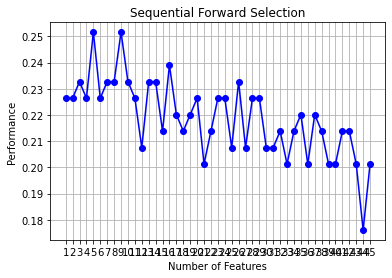

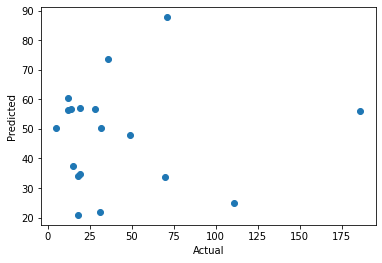

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Selected features: (4, 10, 26, 41)


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


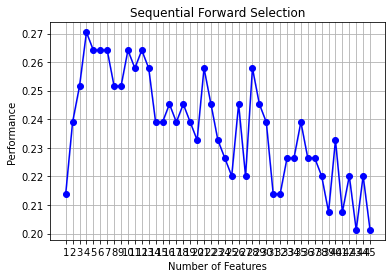

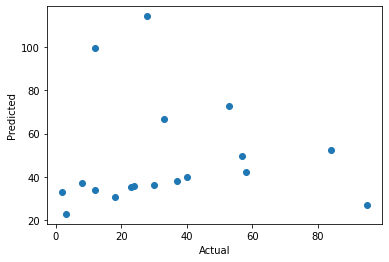

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Selected features: (0, 10, 27, 29, 32, 36, 40, 41)


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


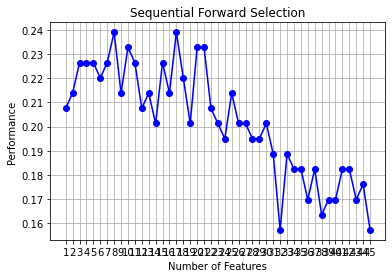

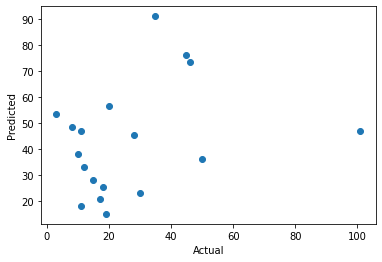

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Selected features: (1, 21, 23, 25, 26, 27, 29, 35, 41, 43)


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


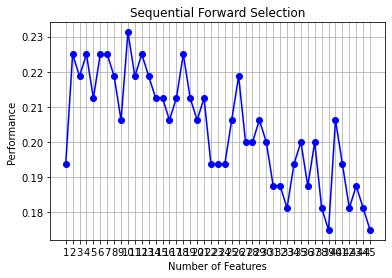

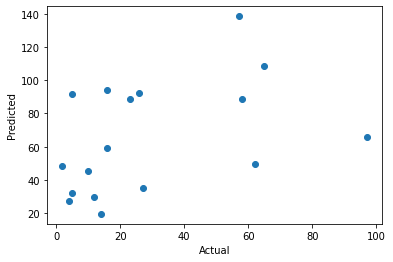

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Selected features: (29, 41)


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


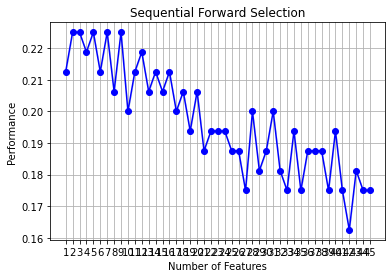

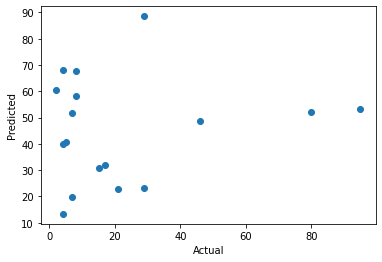

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Selected features: (8, 22, 29, 32)


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


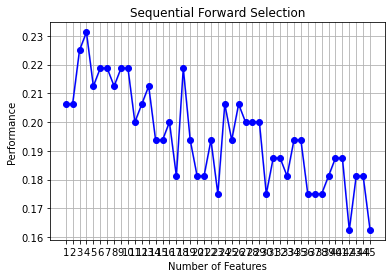

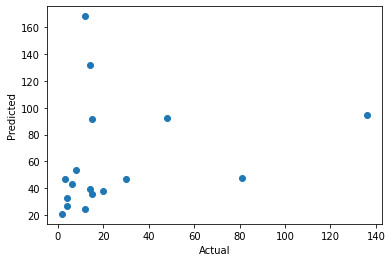

Scores: [0.08810972634900394, -0.21732421583564543, -0.33106865496733007, -0.3048007009910325, -0.1343275461374014, -1.1653582199212198, -0.8130717381534189, -2.218243815844763, -1.0971498038430467, -1.9941694916387145]
Mean: -0.819
Std: 0.754
Scores: [4688.624565784258, 6175.89152167284, 4594.228653222223, 4083.5147444444447, 2174.7859868209875, 1430.292619506173, 922.8814942222222, 2347.4026293856205, 1473.2005694705883, 3409.9964352941174]
Mean: 3130.082
Std: 1639.164


In [5]:
# random forest
!pip install joblib
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib import pyplot as plt
import xgboost as xgb
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

chargers_address = pd.read_csv('https://raw.githubusercontent.com/amberguo/ev-charger/main/stations_with_geoanalyzed_features_and_outcomes_1_km.csv')

X_full = chargers_address[chargers_address.columns.difference(['Unnamed: 0.1', 'total_connection_time', 'total_amount', 'total_kwh', 'total_sessions','lat','lon','Unnamed: 0', 'Station','Address', 'zipcode', 'Geo_FIPS'])]
y_full = chargers_address['total_sessions']

kfold = KFold(n_splits=10)

r2scores = []
scores = []
cvlist = list(kfold.split(X_full))
for train_index, test_index in kfold.split(X_full):   
    X_train, X_test = X_full.iloc[train_index], X_full.iloc[test_index]
    y_train, y_test = y_full[train_index], y_full[test_index]

    # Transformation
    pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)
    # pt = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
    X_train = pt.fit_transform(X_train)
    X_test = pt.transform(X_test)

    # feature selection
    estimator = RandomForestClassifier(max_depth=2, random_state=0)
    # estimator = xgb.XGBClassifier()
    sfs1 = SFS(estimator, k_features="best", forward=True, floating=False, scoring='accuracy', cv=0)
    
    sfs1 = sfs1.fit(X_train, y_train)
    print('Selected features:', sfs1.k_feature_idx_)
    #print(sfs.subsets_)
   
    fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

    plt.title('Sequential Forward Selection')
    plt.grid()
    plt.show()

    X_train = sfs1.transform(X_train)
    X_test = sfs1.transform(X_test)

    # regression
    xgb_model = RandomForestRegressor()
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    r2scores.append(r2_score(y_test, y_pred))
    scores.append(mean_squared_error(y_test, y_pred))

    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

display_scores(r2scores)
display_scores(scores)

In [ ]:

display_scores(r2scores)
display_scores(scores)

Scores: [-0.1638906084605689, -0.3013941968383742]
Mean: -0.233
Std: 0.069
Scores: [6100.96825187381, 4189.469445714286]
Mean: 5145.219
Std: 955.749
